# 🚢 Titanic Survival Classification: Model Training and Evaluation

This notebook guides you through the complete machine learning pipeline: **data preparation**, **model training** (Logistic Regression, Decision Tree, Random Forest), and **performance evaluation** using the `train.csv` file. You will split the data for internal testing and use visualization tools to interpret your results.

**Your task is to fill in all sections marked `### YOUR CODE HERE ###`**.

### 1. Setup and Data Loading

Import all necessary libraries and load the dataset. **Note:** Ensure `train.csv` is in the same directory.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the data
df = pd.read_csv('train.csv')

# Define the target variable (y) and features (X)
X = df.drop('Survived', axis=1)
y = df['Survived']

print("Data shape:", df.shape)


Data shape: (891, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


***
### 2. Data Preprocessing Pipeline

Define and build a `ColumnTransformer` pipeline to handle missing values and encode categorical features.

In [27]:
# Features to impute with the median (numerical)
from sklearn.discriminant_analysis import StandardScaler


numerical_features = ['Age', 'Fare']

# Features to impute with the mode and One-Hot Encode (categorical/ordinal)
categorical_features = ['Embarked', 'Sex', 'Pclass']

# A. Numerical Pipeline: Impute with Median
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# B. Categorical Pipeline: Impute with Mode, then One-Hot Encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore')) # Hint: Use OneHotEncoder
])

# C. Combine all steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop' # Drop all other columns
)

# Fit and Transform the data
X_processed = preprocessor.fit_transform(X)  # Hint: Use the preprocessor object's .fit_transform() method on X
print("Shape of processed data:", X_processed.shape)

Shape of processed data: (891, 10)


***
### 3. Data Splitting

Split the processed data into training and testing sets.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size= 0.2,  ### YOUR CODE HERE ###,
    random_state=42
)
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Train samples: 712, Test samples: 179


***
### 4. Plotting Functions

Functions to help visualize the model's performance and structure.

In [62]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    """Plots the confusion matrix for a given model predictions."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Did Not Survive', 'Survived'],
                yticklabels=['Did Not Survive', 'Survived'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

def get_feature_names(preprocessor, X):
    """Extracts the final feature names after preprocessing."""
    feature_names = preprocessor.get_feature_names_out()
    return feature_names

***
### 5. Model Training and Evaluation

Train each of the three models, calculate accuracy, and generate plots.

#### 5.1. Logistic Regression

In [64]:
# Initialize and Train the Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train) # Hint: Fit the model using X_train, y_train and lr_model.fit()

# Predict and Evaluate
lr_pred = lr_model.predict(X_train) # Hint Use lr_model.predict()
lr_accuracy = accuracy_score(y_train, lr_pred)  # Hint: use accuracy_score
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")


#plot_confusion_matrix(y_test, lr_pred, 'Logistic Regression')

Logistic Regression Accuracy: 0.7949


#### 5.2. Decision Tree Classifier

Decision Tree Accuracy: 0.7989


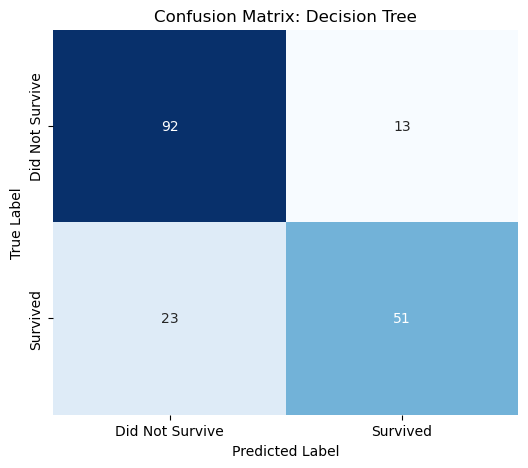

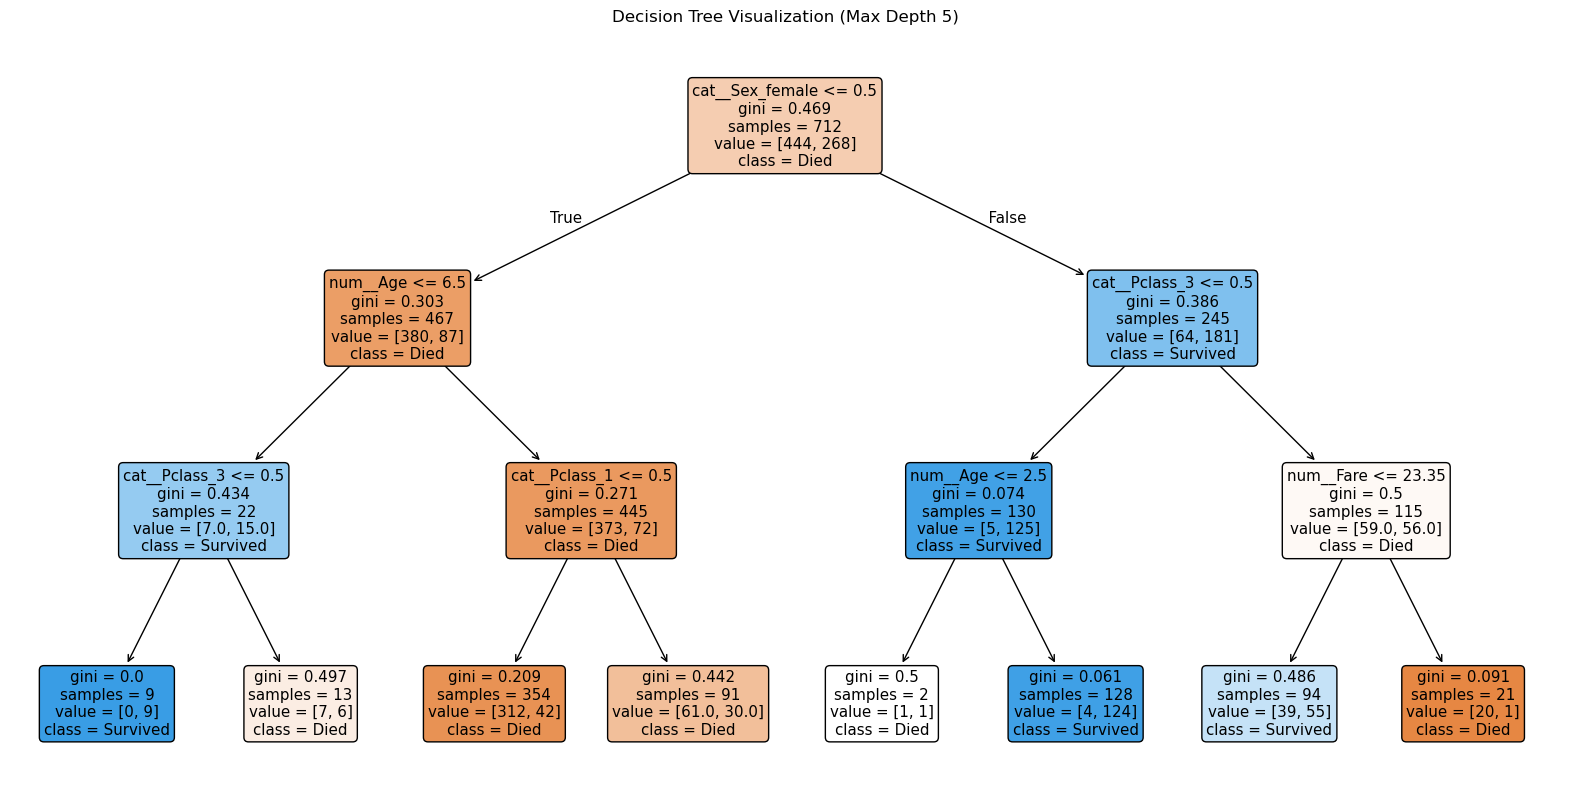

In [66]:
# Initialize and Train the Model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train) # Hint: Fit the model

# Predict and Evaluate
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test,dt_pred)  # Hint: Use the prediction variable
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

plot_confusion_matrix(y_test, dt_pred, 'Decision Tree')

# Visualization of the Tree Structure
feature_names = get_feature_names(preprocessor, X)
plt.figure(figsize=(20,10))
plot_tree(dt_model,
          feature_names=feature_names,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True)
plt.title('Decision Tree Visualization (Max Depth 5)')
plt.show()

#### 5.3. Random Forest Classifier

Random Forest Accuracy: 0.8101


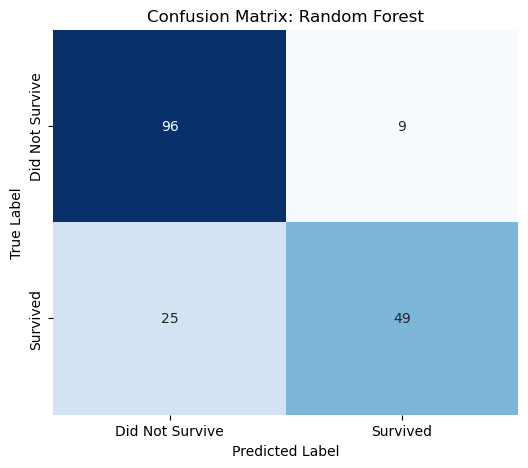

In [67]:
# Initialize and Train the Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train) # Hint: Fit the model

# Predict and Evaluate
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)  # Hint: Use the prediction variable
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

plot_confusion_matrix(y_test, rf_pred, 'Random Forest')

***
### 6. Conclusion and Analysis

**Compare the results:**

1. Which model achieved the highest accuracy score on the test data?
    * **Answer: Random Forest

2. (Optional) Why do you think that specific model performed the best (or worst) in this classification task? (Consider model complexity and ensemble methods.)
    * **Analysis:** **`### YOUR ANALYSIS HERE ###`**